# Ukraine War jun 24th

https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [3]:
df_e = pd.read_csv('/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/08. example projects/02. ukraine war/russia_losses_equipment.csv')
df_p = pd.read_csv('/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/08. example projects/02. ukraine war/russia_losses_personnel.csv')

In [4]:
df_e.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [5]:
df_p.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


# Merge Datasets

In [6]:
df = df_e.merge(df_p, how='outer', on='date')

# month, day of week

extracting the month and day of week from data feature into new feature

In [7]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['dayofweek'] = pd.DatetimeIndex(df['date']).dayofweek

# set date to index

set index at date for pandas plotting

In [8]:
df.set_index('date', inplace=True)

In [9]:
df.head()

,day_x,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,...,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,day_y,personnel,personnel*,POW,month,dayofweek
date,,,,,,,,,,,,,,,,,,,,,
2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,...,NaN,NaN,NaN,NaN,2,2800,about,0,2,4
2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,...,NaN,NaN,NaN,NaN,3,4300,about,0,2,5
2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,...,NaN,NaN,NaN,NaN,4,4500,about,0,2,6
2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,...,NaN,NaN,NaN,NaN,5,5300,about,0,2,0
2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,...,NaN,NaN,NaN,NaN,6,5710,about,200,3,1


# EDA

In [10]:
# change style of plots
import matplotlib
matplotlib.style.use('bmh')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2022-02-25 to 2022-06-24
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day_x                      120 non-null    int64  
 1   aircraft                   120 non-null    int64  
 2   helicopter                 120 non-null    int64  
 3   tank                       120 non-null    int64  
 4   APC                        120 non-null    int64  
 5   field artillery            120 non-null    int64  
 6   MRL                        120 non-null    int64  
 7   military auto              65 non-null     float64
 8   fuel tank                  65 non-null     float64
 9   drone                      120 non-null    int64  
 10  naval ship                 120 non-null    int64  
 11  anti-aircraft warfare      120 non-null    int64  
 12  special equipment          101 non-null    float64
 13  mobile SRBM system         36 non-null 

## Null Values

In [12]:
df.isnull().sum()

day_x                         0
aircraft                      0
helicopter                    0
tank                          0
APC                           0
field artillery               0
MRL                           0
military auto                55
fuel tank                    55
drone                         0
naval ship                    0
anti-aircraft warfare         0
special equipment            19
mobile SRBM system           84
vehicles and fuel tanks      65
cruise missiles              65
greatest losses direction    89
day_y                         0
personnel                     0
personnel*                    0
POW                           0
month                         0
dayofweek                     0
dtype: int64

**Obervations**

+ many features have null values.

## palette

In [13]:
# color palette for use in with plots
palette = ['#639BA9', '#D6B862', '#D1684E', '#695872', '#8BC2B2']

## pct_change features

engineering percentage change row from row feature 

In [14]:
for feat in df.columns:
  if (df[feat].dtype == 'float') | (df[feat].dtype == 'int'):
    df[f'{feat}_pct_change'] = df[feat].pct_change() * df[feat].max()

## diff features

creating features that represent the change in the running total to represent the change happening each time period.  this should give a better seem of how the was is evolving.

In [176]:
for feat in df.columns:
  if (df[feat].dtype == 'float') | (df[feat].dtype == 'int'):
    df[f'{feat}_diff'] = df[feat].diff()

In [16]:
df.columns

Index(['day_x', 'aircraft', 'helicopter', 'tank', 'APC', 'field artillery',
       'MRL', 'military auto', 'fuel tank', 'drone', 'naval ship',
       'anti-aircraft warfare', 'special equipment', 'mobile SRBM system',
       'vehicles and fuel tanks', 'cruise missiles',
       'greatest losses direction', 'day_y', 'personnel', 'personnel*', 'POW',
       'month', 'dayofweek', 'day_x_pct_change', 'aircraft_pct_change',
       'helicopter_pct_change', 'tank_pct_change', 'APC_pct_change',
       'field artillery_pct_change', 'MRL_pct_change',
       'military auto_pct_change', 'fuel tank_pct_change', 'drone_pct_change',
       'naval ship_pct_change', 'anti-aircraft warfare_pct_change',
       'special equipment_pct_change', 'mobile SRBM system_pct_change',
       'vehicles and fuel tanks_pct_change', 'cruise missiles_pct_change',
       'day_y_pct_change', 'personnel_pct_change', 'POW_pct_change',
       'month_pct_change', 'dayofweek_pct_change', 'day_x_diff',
       'aircraft_diff', 'h

In [58]:
# checking for null values in diff features
df[['day_x_diff','aircraft_diff', 'helicopter_diff', 'tank_diff', 'APC_diff',
       'field artillery_diff', 'MRL_diff', 'military auto_diff',
       'fuel tank_diff', 'drone_diff', 'naval ship_diff',
       'anti-aircraft warfare_diff', 'special equipment_diff',
       'mobile SRBM system_diff', 'vehicles and fuel tanks_diff',
       'cruise missiles_diff', 'day_y_diff', 'personnel_diff', 'POW_diff',
       'month_diff', 'dayofweek_diff', 'day_x_pct_change_diff',
       'aircraft_pct_change_diff', 'helicopter_pct_change_diff',
       'tank_pct_change_diff', 'APC_pct_change_diff',
       'field artillery_pct_change_diff', 'MRL_pct_change_diff',
       'military auto_pct_change_diff', 'fuel tank_pct_change_diff',
       'drone_pct_change_diff', 'naval ship_pct_change_diff',
       'anti-aircraft warfare_pct_change_diff',
       'special equipment_pct_change_diff',
       'mobile SRBM system_pct_change_diff',
       'vehicles and fuel tanks_pct_change_diff',
       'cruise missiles_pct_change_diff', 'day_y_pct_change_diff',
       'personnel_pct_change_diff', 'POW_pct_change_diff',
       'month_pct_change_diff', 'dayofweek_pct_change_diff']].isnull().sum()

day_x_diff                                  1
aircraft_diff                               1
helicopter_diff                             1
tank_diff                                   1
APC_diff                                    1
field artillery_diff                        1
MRL_diff                                    1
military auto_diff                         56
fuel tank_diff                             56
drone_diff                                  1
naval ship_diff                             1
anti-aircraft warfare_diff                  1
special equipment_diff                     20
mobile SRBM system_diff                    85
vehicles and fuel tanks_diff               66
cruise missiles_diff                       66
day_y_diff                                  1
personnel_diff                              1
POW_diff                                    1
month_diff                                  1
dayofweek_diff                              1
day_x_pct_change_diff             

In [70]:
# list of diff features
diff_feats = ['day_x_diff','aircraft_diff', 'helicopter_diff', 'tank_diff', 'APC_diff',
       'field artillery_diff', 'MRL_diff', 'military auto_diff',
       'fuel tank_diff', 'drone_diff', 'naval ship_diff',
       'anti-aircraft warfare_diff', 'special equipment_diff',
       'mobile SRBM system_diff', 'vehicles and fuel tanks_diff',
       'cruise missiles_diff', 'day_y_diff', 'personnel_diff', 'POW_diff',
       'month_diff', 'dayofweek_diff', 'day_x_pct_change_diff',
       'aircraft_pct_change_diff', 'helicopter_pct_change_diff',
       'tank_pct_change_diff', 'APC_pct_change_diff',
       'field artillery_pct_change_diff', 'MRL_pct_change_diff',
       'military auto_pct_change_diff', 'fuel tank_pct_change_diff',
       'drone_pct_change_diff', 'naval ship_pct_change_diff',
       'anti-aircraft warfare_pct_change_diff',
       'special equipment_pct_change_diff',
       'mobile SRBM system_pct_change_diff',
       'vehicles and fuel tanks_pct_change_diff',
       'cruise missiles_pct_change_diff', 'day_y_pct_change_diff',
       'personnel_pct_change_diff', 'POW_pct_change_diff',
       'month_pct_change_diff', 'dayofweek_pct_change_diff']

In [71]:
# filling null values in diff features with 0
for feat in diff_feats:
  df[feat] = df[feat].fillna(0)

In [72]:
# checking if there are any null in diff features
df[['day_x_diff','aircraft_diff', 'helicopter_diff', 'tank_diff', 'APC_diff',
       'field artillery_diff', 'MRL_diff', 'military auto_diff',
       'fuel tank_diff', 'drone_diff', 'naval ship_diff',
       'anti-aircraft warfare_diff', 'special equipment_diff',
       'mobile SRBM system_diff', 'vehicles and fuel tanks_diff',
       'cruise missiles_diff', 'day_y_diff', 'personnel_diff', 'POW_diff',
       'month_diff', 'dayofweek_diff', 'day_x_pct_change_diff',
       'aircraft_pct_change_diff', 'helicopter_pct_change_diff',
       'tank_pct_change_diff', 'APC_pct_change_diff',
       'field artillery_pct_change_diff', 'MRL_pct_change_diff',
       'military auto_pct_change_diff', 'fuel tank_pct_change_diff',
       'drone_pct_change_diff', 'naval ship_pct_change_diff',
       'anti-aircraft warfare_pct_change_diff',
       'special equipment_pct_change_diff',
       'mobile SRBM system_pct_change_diff',
       'vehicles and fuel tanks_pct_change_diff',
       'cruise missiles_pct_change_diff', 'day_y_pct_change_diff',
       'personnel_pct_change_diff', 'POW_pct_change_diff',
       'month_pct_change_diff', 'dayofweek_pct_change_diff']].isnull().sum()

day_x_diff                                 0
aircraft_diff                              0
helicopter_diff                            0
tank_diff                                  0
APC_diff                                   0
field artillery_diff                       0
MRL_diff                                   0
military auto_diff                         0
fuel tank_diff                             0
drone_diff                                 0
naval ship_diff                            0
anti-aircraft warfare_diff                 0
special equipment_diff                     0
mobile SRBM system_diff                    0
vehicles and fuel tanks_diff               0
cruise missiles_diff                       0
day_y_diff                                 0
personnel_diff                             0
POW_diff                                   0
month_diff                                 0
dayofweek_diff                             0
day_x_pct_change_diff                      0
aircraft_p

## features

grouping features into subgroups of EDA

In [17]:
feats_a = ['aircraft', 'helicopter', 'drone']
feats_v = ['tank', 'APC', 'naval ship']
feats_w = ['field artillery', 'MRL', 'military auto', 'mobile SRBM system', 'cruise missiles']
feats_s = ['fuel tank', 'anti-aircraft warfare', 'special equipment', 'vehicles and fuel tanks']
feats_p = [ 'personnel','POW']# 'personnel*', 'greatest losses direction',

##  def feature_plot

In [18]:
def feature_plot(feats):
  dim = len(feats)
  ax = df[[feat+'_pct_change' for feat in feats]].plot(kind='bar', alpha=.65,
                                                    subplots=dim, layout=(dim,1), figsize=(12,len(feats)*2.5),
                                                    color=palette)# barplot of percentage change
  df[feats].plot(subplots=dim, layout=(dim,1),
                        figsize=(12,len(feats)*2.5), ax=ax, color=palette) # line plot of running total
  
  plt.locator_params(axis='x', nbins=20)
  plt.xticks(rotation=65)
  plt.show()

## def month_plot_mean

In [19]:
def month_plot_mean(feats):
  df.groupby('month').mean()[feats].plot(kind='bar', color=palette) # bar plot by month
  plt.show()

## def month_plot_sum

In [20]:
def month_plot_sum(feats):
  df.groupby('month').sum()[[feat+'_diff' for feat in feats]].plot(kind='bar', color=palette)
  plt.show()

In [21]:
df.groupby('month').mean()

,day_x,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,...,anti-aircraft warfare_pct_change_diff,special equipment_pct_change_diff,mobile SRBM system_pct_change_diff,vehicles and fuel tanks_pct_change_diff,cruise missiles_pct_change_diff,day_y_pct_change_diff,personnel_pct_change_diff,POW_pct_change_diff,month_pct_change_diff,dayofweek_pct_change_diff
month,,,,,,,,,,,,,,,,,,,,,
2,3.5,23.250000,22.000000,131.500000,686.000000,55.500000,8.250000,162.750000,60.000000,1.750000,...,NaN,NaN,NaN,NaN,NaN,-15.125000,-6179.773810,NaN,0.0,-3.75
3,21.0,79.741935,93.967742,419.290323,1325.258065,191.225806,68.483871,765.806452,64.064516,24.967742,...,NaN,0.204082,-1.0,NaN,NaN,-0.864286,-185.144384,NaN,0.0,NaN
4,51.5,164.200000,144.366667,782.600000,2044.766667,371.200000,124.966667,1456.566667,76.000000,146.566667,...,0.180822,-0.030722,0.0,NaN,NaN,-0.053187,-3.297663,-1.119535,0.0,NaN
5,82.0,201.193548,164.064516,1216.548387,2956.548387,560.354839,189.161290,NaN,NaN,414.709677,...,-0.174989,-0.062435,0.0,-0.709682,0.080070,-0.019391,-4.180706,0.000000,0.0,NaN
6,109.5,212.916667,178.500000,1429.041667,3490.625000,715.583333,223.375000,NaN,NaN,576.208333,...,0.000000,0.000000,0.0,-0.592133,-0.096751,-0.010503,-2.932022,0.000000,0.0,NaN


## univariate analysis

### aircraft

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:225: UserWarning: When passing multiple axes, layout keyword is ignored
  "When passing multiple axes, layout keyword is ignored", UserWarning


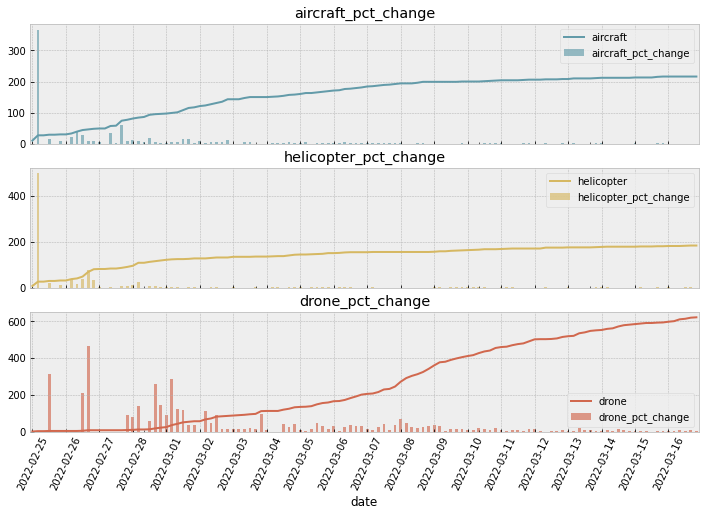

In [22]:
feature_plot(feats_a)

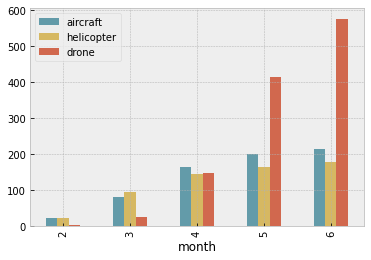

In [23]:
month_plot_mean(feats_a)

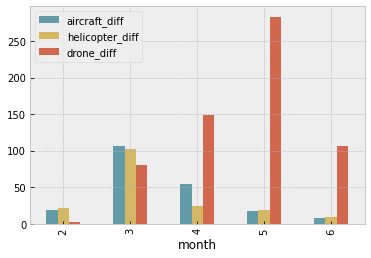

In [24]:
month_plot_sum(feats_a)

**Observations aircraft**

+ The rate at which helicopters and aircraft are being downed has significatly reduced from the peak of over 100 each to only around 25 in May.  
 + Still had substaintial downed aircraft into May with over 50 downed aircraft but only 25 downed helicopters. 
+ the most downed drones didn't surpasses the monthly downed aircraft or helicopters until May.

*Takeaway*
+ It can be seen that Russia changed to a more cautious stragtegy staring in April. 
+ Could this be part of increase long range missile attack and less direct attacks from Russia?


### vehicles

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:225: UserWarning: When passing multiple axes, layout keyword is ignored
  "When passing multiple axes, layout keyword is ignored", UserWarning


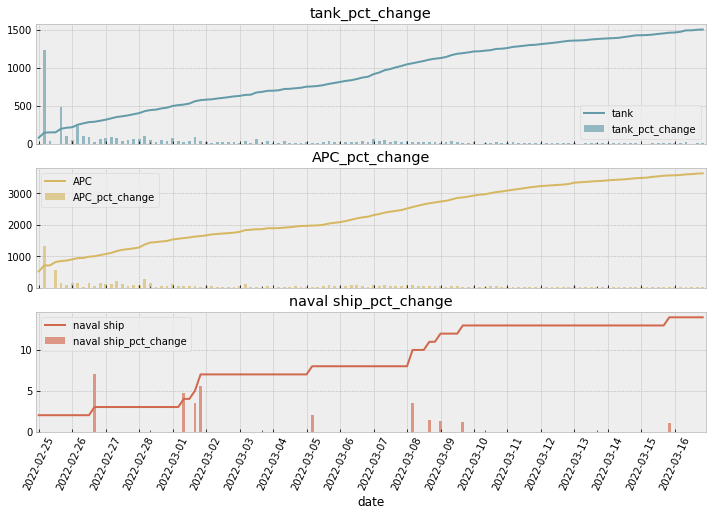

In [25]:
feature_plot(feats_v)

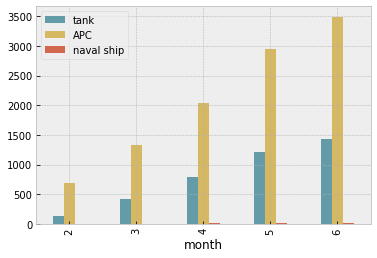

In [26]:
month_plot_mean(feats_v)

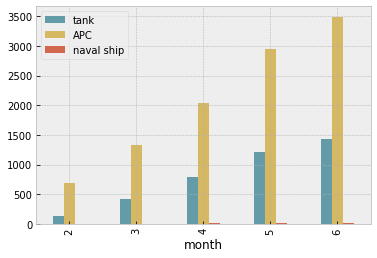

In [27]:
month_plot_mean(feats_v)

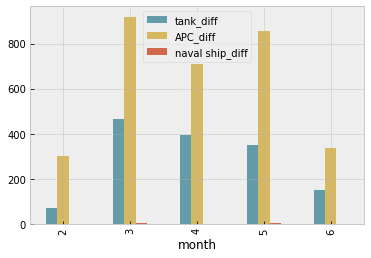

In [28]:
month_plot_sum(feats_v)

**Observations vehicles**

+ The amount of downed tanks and APCs doesn't drop off until Jun but remains strong until May.  
+ In Jun almost 200 tanks and and 300 APCs were downed.  

*Takeaway*
+ In contrast to the manned aircrafts downed vehciles downed remained strong even into Jun as this is only to Jun 24th.  
+ Naval ships were down in March and May.

### weapons

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:225: UserWarning: When passing multiple axes, layout keyword is ignored
  "When passing multiple axes, layout keyword is ignored", UserWarning


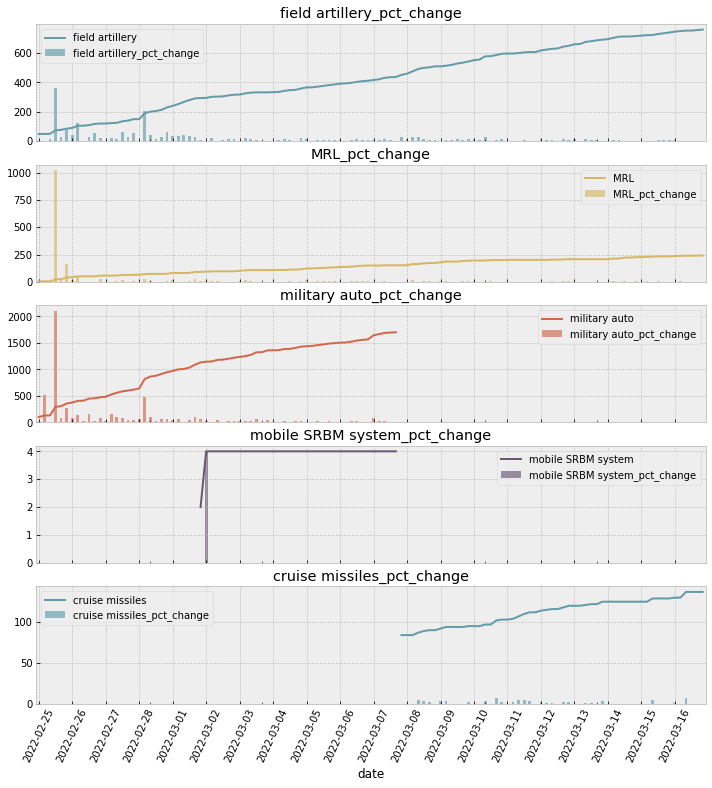

In [29]:
feature_plot(feats_w)

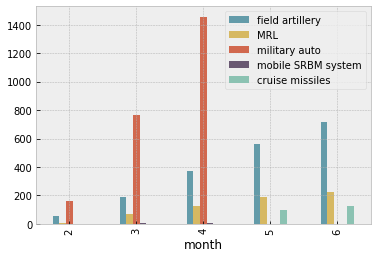

In [30]:
month_plot_mean(feats_w)

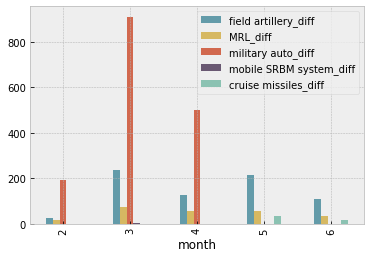

In [31]:
month_plot_sum(feats_w)

**Observations weapons**

+ steadily decrease amount of down weapons.

*Takeways*
+ Less weapons are being down but from News more are being fired.  This conflicts with News reports. 

### supply

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:225: UserWarning: When passing multiple axes, layout keyword is ignored
  "When passing multiple axes, layout keyword is ignored", UserWarning


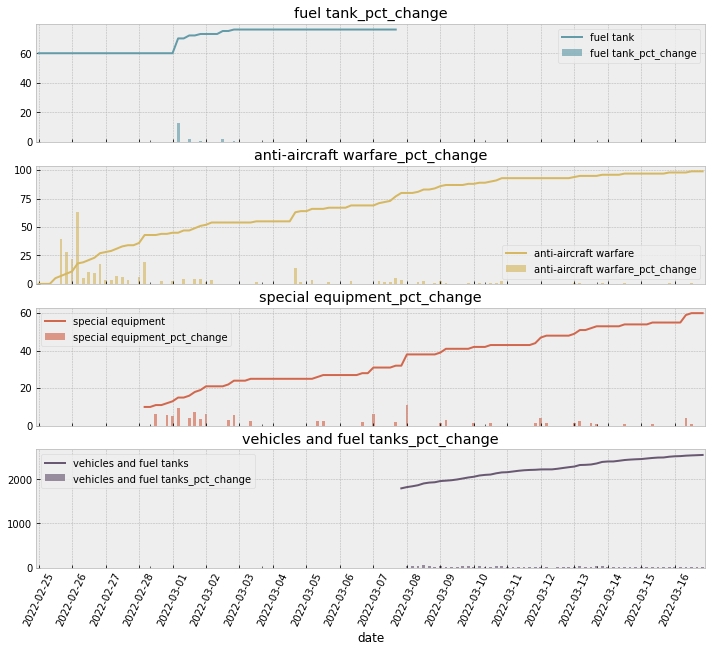

In [32]:
feature_plot(feats_s)

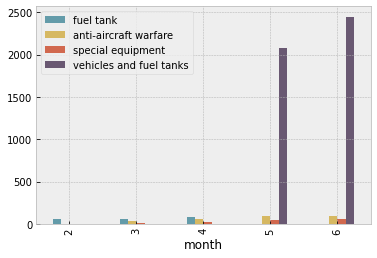

In [33]:
month_plot_mean(feats_s)

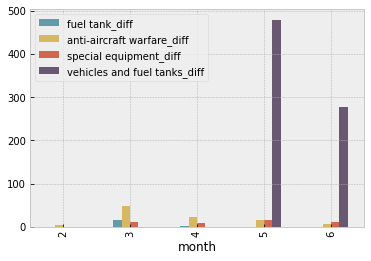

In [34]:
month_plot_sum(feats_s)

**Observations**

Dramatic increase in May for the amount of vehicles and fuel tanks being downed.  

*Takeaway*
Could this be because of a change to focusing on attacking supply lines?

### personnel

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:225: UserWarning: When passing multiple axes, layout keyword is ignored
  "When passing multiple axes, layout keyword is ignored", UserWarning


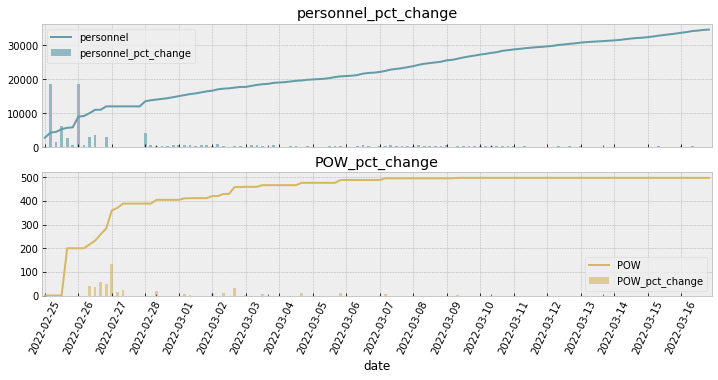

In [35]:
feature_plot(feats_p)

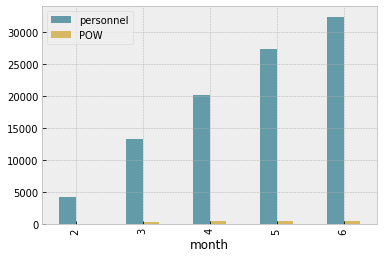

In [36]:
month_plot_mean(feats_p)

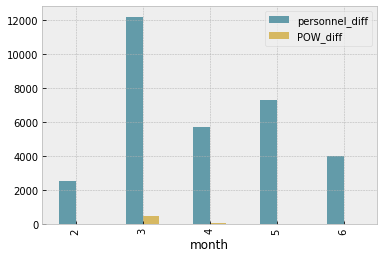

In [37]:
month_plot_sum(feats_p)

### 'personnel*', 'greatest losses direction'

In [38]:
df['personnel*'].value_counts()

about    114
more       6
Name: personnel*, dtype: int64

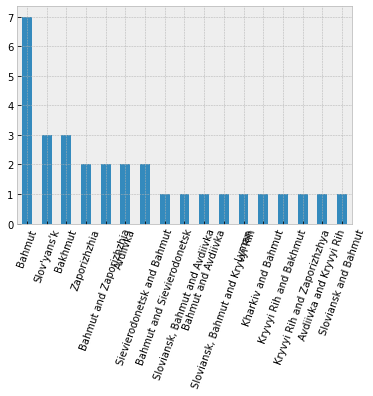

In [39]:
df['greatest losses direction'].value_counts().plot(kind='bar')
plt.xticks(rotation=70)
plt.show()

## bivariate analysis

## def make_cat

In [40]:
def make_cat(x):
  if x < 200:
    cat='low'
  elif x > 500:
    cat='high'
  else:
    cat='medium'
  return cat

In [41]:
df['personnel_diff_cat'] = df['personnel_diff'].apply(make_cat)

In [42]:
[feat+'_diff' for feat in feats_a]

['aircraft_diff', 'helicopter_diff', 'drone_diff']

## def make_pairgrid

In [99]:
def make_pairgrid(feats):
  g = sns.PairGrid(df[[l+['personnel_diff_cat'] for l in [[feat+'_diff' for feat in feats]]][0]].dropna(),
                   hue='personnel_diff_cat', palette=palette[:3]) # pairgrid structure
  g.map_diag(sns.histplot) #diagonal hist plot
  g.map_upper(sns.kdeplot) # upper right contour plots
  g.map_lower(sns.regplot) # bottom left linear regression plots
  g.add_legend() # add legend
  plt.show()

### aircraft

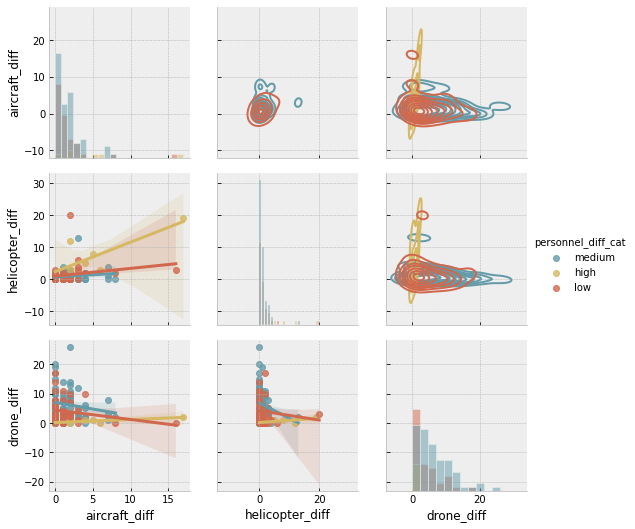

In [100]:
make_pairgrid(feats_a)

**Observations**

+ losses in aircrats so correlation losses in personnel, more significant for high personnel losses

### vehicles

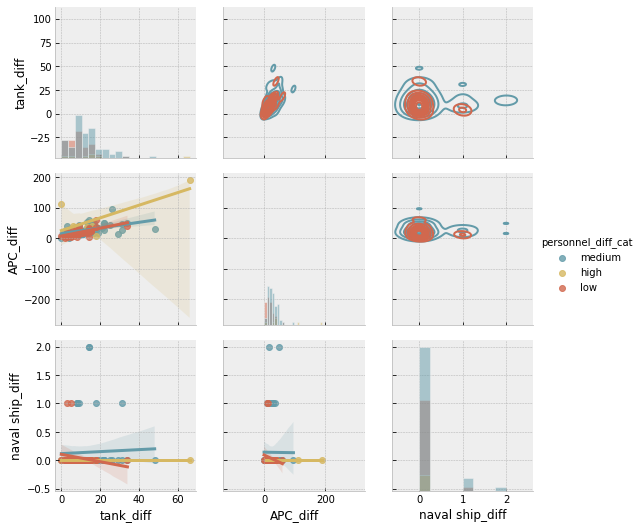

In [101]:
make_pairgrid(feats_v)

### weapons

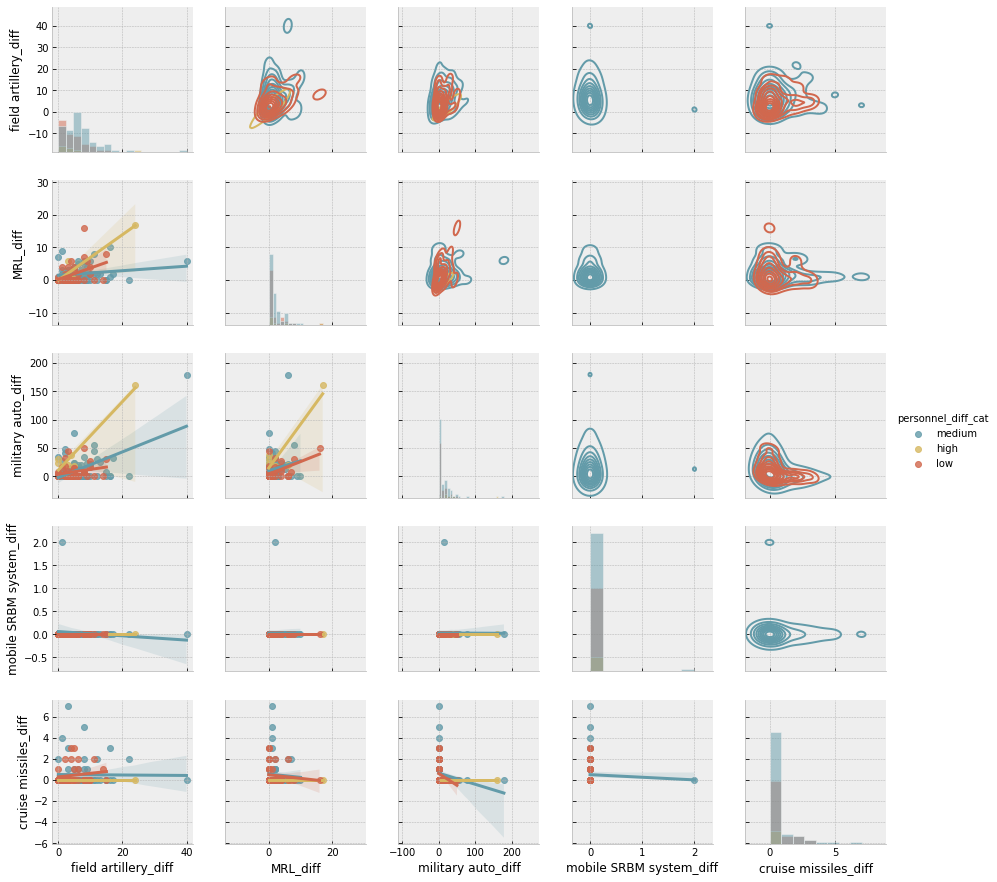

In [102]:
make_pairgrid(feats_w)

**Observations**

No noticable patterns.

### supply

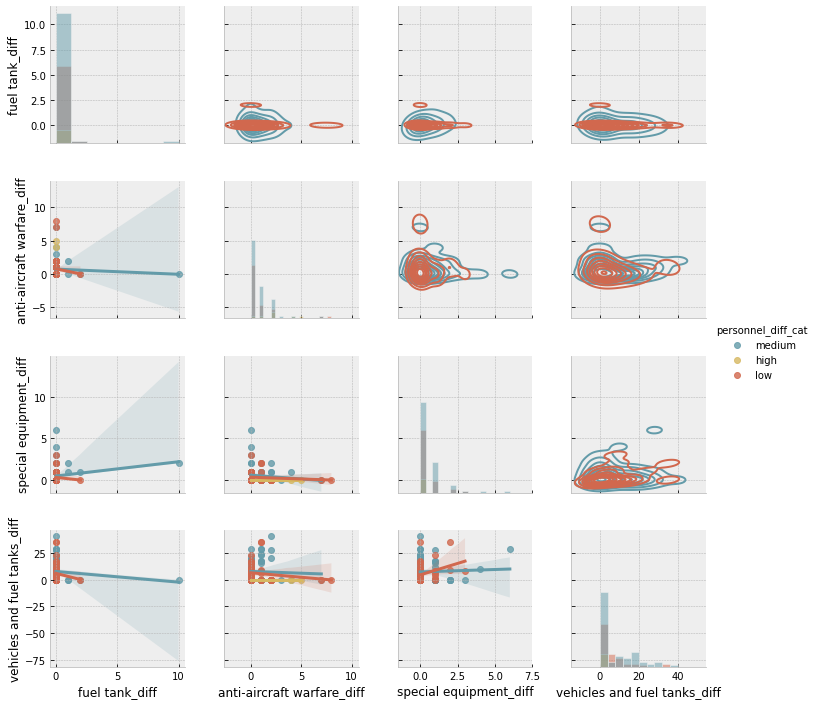

In [103]:
make_pairgrid(feats_s)

**Observations** 

No noticable patterns.

### personnel

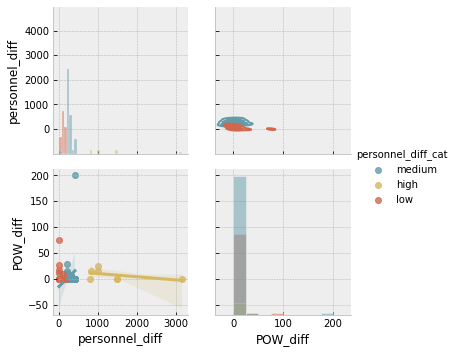

In [104]:
make_pairgrid(feats_p)

**Observations**

*Takeaway*
No correlation between POWs and personnel downed. 

## Correlation Analysis

### def corr_plot

In [165]:
def corr_plot(feats):
  sns.heatmap(df[[feat+'_diff' for feat in feats]].corr(), annot=True,
              cmap=sns.diverging_palette(210, 25, l=65, center="light",
                                         as_cmap=True))
  plt.show()

### aircraft

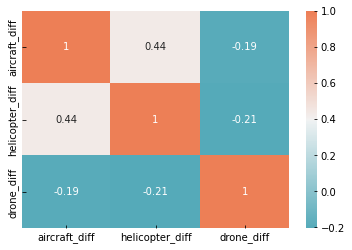

In [166]:
corr_plot(feats_a)

**Observations**

+ losses in aircraft and helicopter show mild correlation


### vehicles

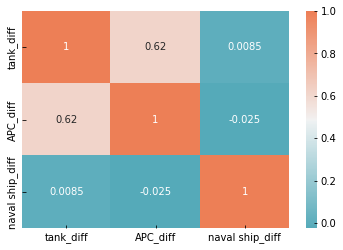

In [167]:
corr_plot(feats_v)

**Oberservations**

+ losses in APCs and tanks so strong mild correlation

### weapons

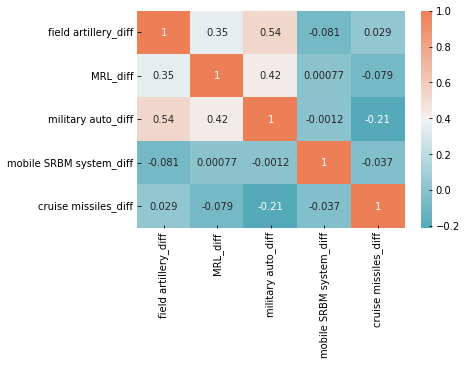

In [168]:
corr_plot(feats_w)

**Observations**

field artillery, military auto, and MRL show mild correlation.

*Takeaway

### supply

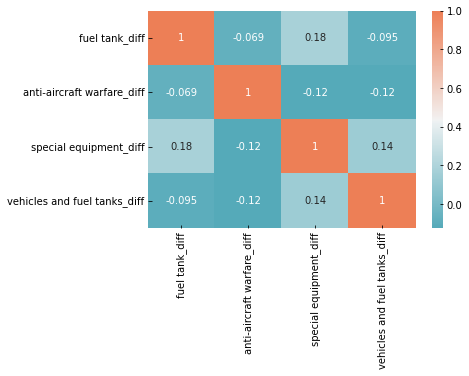

In [169]:
corr_plot(feats_s)

### personnel

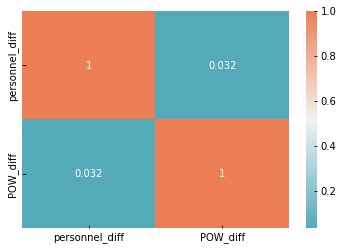

In [170]:
corr_plot(feats_p)

## All Features

In [173]:
feats_list = [feats_a,feats_v,feats_w,feats_s,feats_p]
feats_all = []
for feats in feats_list:
  feats_all.extend(feats)


In [172]:
feats_all

['aircraft',
 'helicopter',
 'drone',
 'tank',
 'APC',
 'naval ship',
 'field artillery',
 'MRL',
 'military auto',
 'mobile SRBM system',
 'cruise missiles',
 'fuel tank',
 'anti-aircraft warfare',
 'special equipment',
 'vehicles and fuel tanks',
 'personnel',
 'POW']

### features all

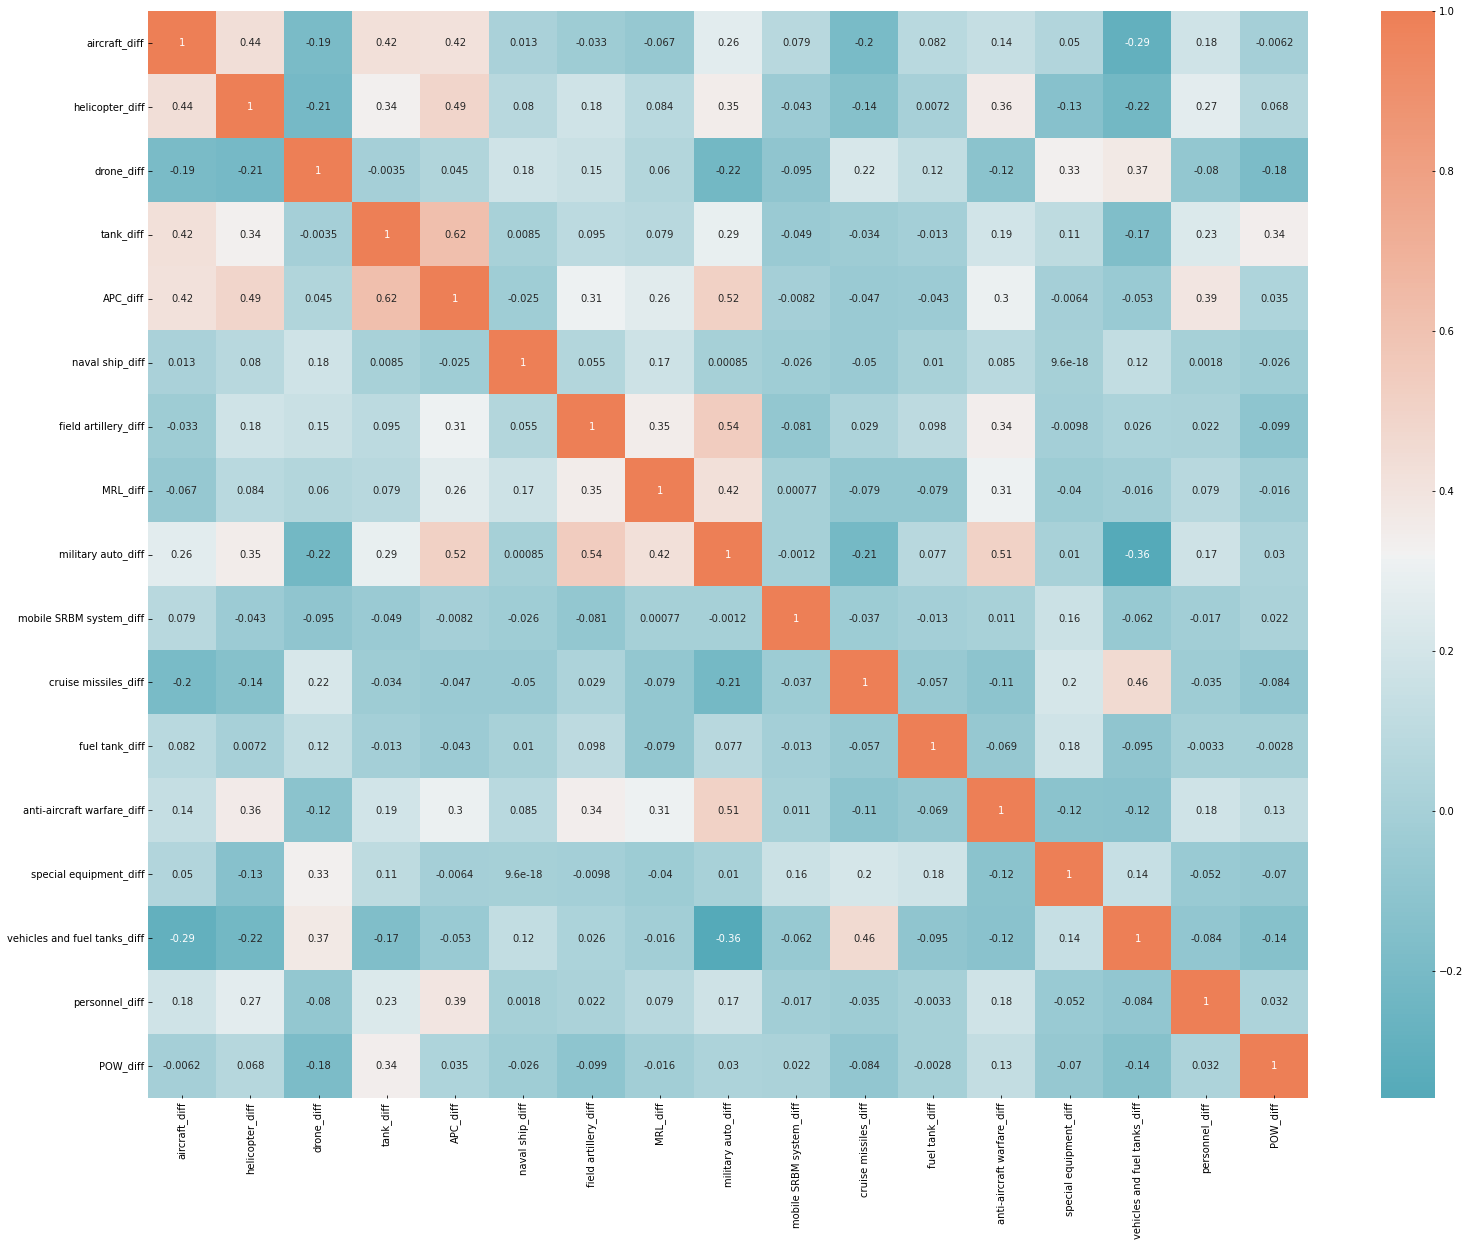

In [175]:
plt.figure(figsize=(26,20))
corr_plot(feats_all)